Project 1 

Teammates (Group 32):
1. Ameya Deshmukh (NUID : 002291838)
2. Anjali Ingle
3. Avani Kala (NUID: 002772623)
4. Wenzhe Zhang
5. Yangwenyu Peng

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Data Aquisition

In [2]:
crime_data = pd.read_csv(r'C:\Users\ronny\Downloads\Crime_Data_from_2020_to_Present.csv')

Data Inspection:

Q2.1 Display the first few rows of the dataset.

In [3]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


Q2.2 Check the data types of each column.

In [4]:
print(crime_data.dtypes)

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object


Q 2.3 Review column names and descriptions, if available.

In [5]:
crime_data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.205990e+05,820599.000000,820599.000000,820599.000000,820599.000000,820599.000000,820599.000000,820589.000000,286078.000000,820589.000000,60413.000000,2025.000000,60.000000,820599.000000,820599.000000
mean,2.161299e+08,1335.627492,10.711722,1117.592487,1.413828,500.803992,29.806031,305.759386,362.916586,500.542192,957.477927,983.615309,990.750000,33.604765,-116.725860
std,1.083045e+07,654.020941,6.093656,609.360686,0.492519,207.807715,21.776511,216.670080,123.754162,207.596108,111.524441,52.844921,27.908218,3.970446,13.786369
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.102046e+08,900.000000,6.000000,621.000000,1.000000,331.000000,7.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.010200,-118.428700
50%,2.201176e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.057500,-118.319300
75%,2.220056e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.161600,-118.273100
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


Data Cleaning

Q3.1 Identify and handle missing data appropriately.

In [6]:
crime_data.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           113485
Vict Age               0
Vict Sex          107946
Vict Descent      107954
Premis Cd             10
Premis Desc          483
Weapon Used Cd    534521
Weapon Desc       534521
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          760186
Crm Cd 3          818574
Crm Cd 4          820539
LOCATION               0
Cross Street      689385
LAT                    0
LON                    0
dtype: int64

In [7]:
#Fill in the missing values in important parts such as age and gender, and delete columns that are not important.
replace_col = [None, 'H', '-']
crime_data['Vict Sex'].replace(replace_col, 'X', inplace=True)
crime_data['Vict Descent'].fillna('Unknown', inplace=True)
crime_data['Weapon Desc'].fillna('Unknown Weapon', inplace=True)
crime_data['Premis Desc'].fillna('Undefined', inplace=True)

In [8]:
crime_data.dropna(subset=['Premis Cd', 'Crm Cd 1'], inplace=True)
crime_data = crime_data.drop(columns=['Mocodes','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street','Weapon Used Cd'])

In [9]:
crime_data.isnull().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Weapon Desc     0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
LAT             0
LON             0
dtype: int64

Q3.2 Check for and remove duplicate rows.

In [10]:
crime_data.duplicated().sum()

0

In [11]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Descent,Premis Cd,Premis Desc,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,B,501.0,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,H,102.0,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,X,726.0,POLICE FACILITY,Unknown Weapon,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown Weapon,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,X,409.0,BEAUTY SUPPLY STORE,Unknown Weapon,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


Q 3.3 Convert data types if needed (e.g., dates to date format, numerical values to
appropriate numeric types).

In [12]:
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])
crime_data.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                 int64
AREA                     int64
AREA NAME               object
Rpt Dist No              int64
Part 1-2                 int64
Crm Cd                   int64
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Premis Cd              float64
Premis Desc             object
Weapon Desc             object
Status                  object
Status Desc             object
Crm Cd 1               float64
LOCATION                object
LAT                    float64
LON                    float64
dtype: object

Q3.4 Deal with outliers if relevant to your analysis.

<AxesSubplot:xlabel='Vict Age'>

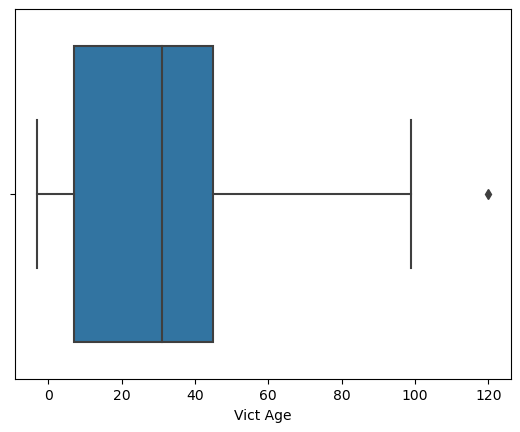

In [13]:
#Using boxplot to find the outliers
sns.boxplot(x="Vict Age", data=crime_data)

In [14]:
#Setting the range of the vict age based on the maximum and minimum, previously observed in describe() and common sense
crime_data = crime_data[(crime_data['Vict Age'] >= 0) & (crime_data['Vict Age'] <100)]
crime_data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,8.205080e+05,820508.000000,820508.000000,820508.000000,820508.000000,820508.000000,820508.000000,820508.000000,820508.000000,820508.000000,820508.000000
mean,2.161290e+08,1335.649065,10.711727,1117.593128,1.413807,500.795730,29.809006,305.751570,500.535733,33.604837,-116.726113
std,1.083031e+07,654.018416,6.093642,609.359226,0.492515,207.806303,21.775206,216.666836,207.595217,3.970143,13.785316
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,0.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.102046e+08,900.000000,6.000000,621.000000,1.000000,331.000000,7.000000,101.000000,331.000000,34.010200,-118.428700
50%,2.201176e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.057500,-118.319300
75%,2.220056e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.161625,-118.273100
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,99.000000,976.000000,956.000000,34.334300,0.000000


In [15]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Descent,Premis Cd,Premis Desc,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,B,501.0,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,H,102.0,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,X,726.0,POLICE FACILITY,Unknown Weapon,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Unknown Weapon,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,X,409.0,BEAUTY SUPPLY STORE,Unknown Weapon,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


In [16]:
crime_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

Q: Demographic factors with specific types of crimes.

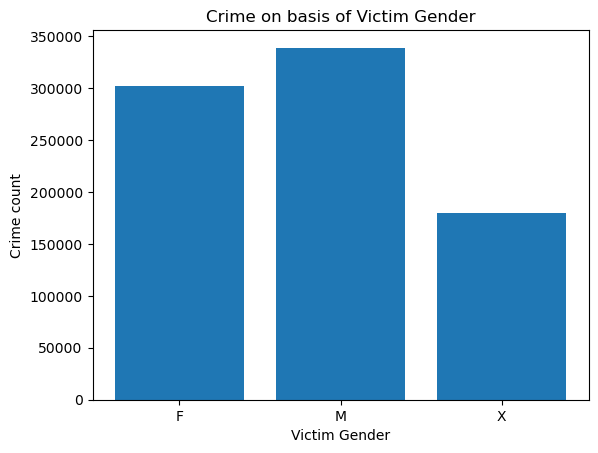

In [17]:
crime_type = crime_data.groupby(['Vict Sex']).size().fillna(0)
plt.bar(crime_type.index, crime_type.values)
plt.title('Crime on basis of Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Crime count')
plt.show()

The above chart shows that the Male Victims are slighty more prone to crime than female. However, the data of Unknown gender(X) is around 20% which is a significant number. This may skew the data analysis somewhat.   

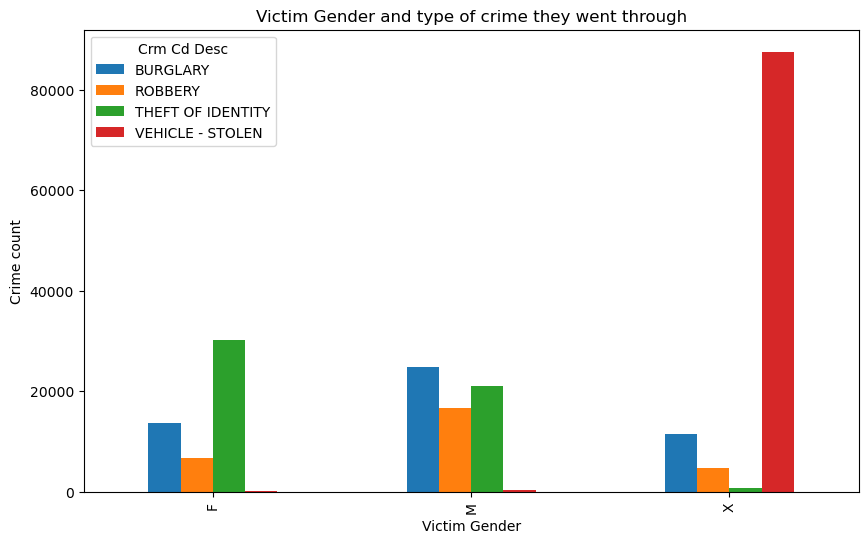

In [18]:
desired_crimes = ['THEFT OF IDENTITY', 'ROBBERY', 'VEHICLE - STOLEN', 'BURGLARY']
desired_crime_df = crime_data[crime_data['Crm Cd Desc'].isin(desired_crimes)]
crime_type = desired_crime_df.groupby(['Vict Sex', 'Crm Cd Desc']).size().unstack().fillna(0)
crime_type.plot(kind='bar', figsize=(10, 6))
plt.title('Victim Gender and type of crime they went through')
plt.xlabel('Victim Gender')
plt.ylabel('Crime count')
plt.show()

The major findings from above bar chart are:
1. Females are most prone to Identity theft
2. Males are most prone to Burglary
3. While the unknown category has most of crime victims from vehicle stolen category of crime. It may be difficult to identify the gender of owner of stolen vehicle.

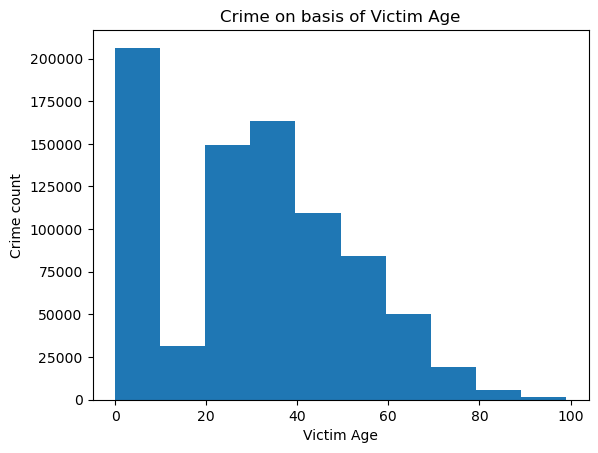

In [19]:
plt.hist(crime_data['Vict Age'])
plt.title('Crime on basis of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Crime count')
plt.show()

There are a lot of victims whose age is unkown, which are filled with 0. While most of victims are of the age 20 years to 40 years

C:\Users\ronny\AppData\Local\Temp\ipykernel_28348\2166256903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desired_crime_df['Age Range'] = pd.cut(desired_crime_df['Vict Age'], bins=age_bins, labels=age_labels)


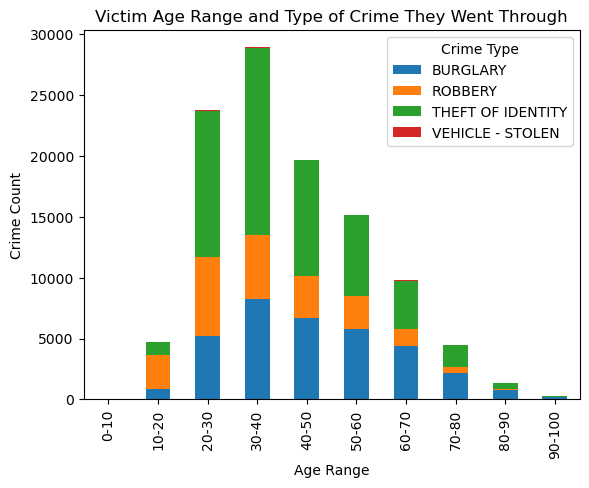

In [20]:
age_bins = list(range(0, 101, 10))  # Bins from 0 to 100 in increments of 10
age_labels = [f'{start}-{start+10}' for start in age_bins[:-1]]  # Labels for the bins

desired_crime_df['Age Range'] = pd.cut(desired_crime_df['Vict Age'], bins=age_bins, labels=age_labels)

crime_type_age = desired_crime_df.groupby(['Age Range', 'Crm Cd Desc']).size().unstack().fillna(0)

crime_type_age.plot(kind='bar', stacked=True)
plt.title('Victim Age Range and Type of Crime They Went Through')
plt.xlabel('Age Range')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type')
plt.show()

Q 3.6 Encode categorical data if present.

In [21]:
# Defining the list of categorical columns
categorical_columns = ['Vict Sex', 'Vict Descent', 'Status', 'Status Desc']

for column in categorical_columns:
    crime_data[column] = LabelEncoder().fit_transform(crime_data[column])

In [22]:
crime_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [23]:
crime_data[['Vict Sex', 'Vict Descent', 'Status', 'Status Desc']]

,Vict Sex,Vict Descent,Status,Status Desc
0,0,2,1,1
1,1,7,3,2
2,2,19,0,0
3,0,18,3,2
4,2,19,3,2
...,...,...,...,...
820594,1,7,3,2
820595,0,7,3,2
820596,1,2,3,2
820597,0,7,3,2


Exploratory Data Analysis (EDA):

Q4.1 Visualize overall crime trends from 2020 to the present year

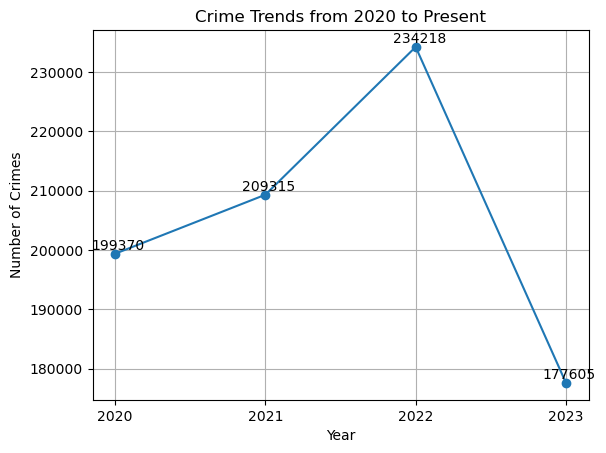

In [24]:
crime_data['Year'] = crime_data['DATE OCC'].dt.year

crime_by_years = crime_data.groupby('Year').size()

plt.plot(crime_by_years.index, crime_by_years.values, marker='o', linestyle='-')
plt.xticks(crime_by_years.index)
plt.title('Crime Trends from 2020 to Present')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)

for x,y in zip(crime_by_years.index, crime_by_years.values):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(2.5,3), ha='center')
plt.show() 

In [25]:
crime_by_years

Year
2020    199370
2021    209315
2022    234218
2023    177605
dtype: int64

The above chart tells the gradual increase in crime rates from year 2020 to 2022 from 200K to approx 240K. The crime rate has fallen to 170K in 2023 which is much lesser than past years. 

In [26]:
crime_data['DATE OCC'].dt.month

0         1
1         1
2         2
3         1
4         1
         ..
820594    1
820595    3
820596    4
820597    7
820598    3
Name: DATE OCC, Length: 820508, dtype: int64

Q4.2 Analyze and visualize seasonal patterns in crime data.

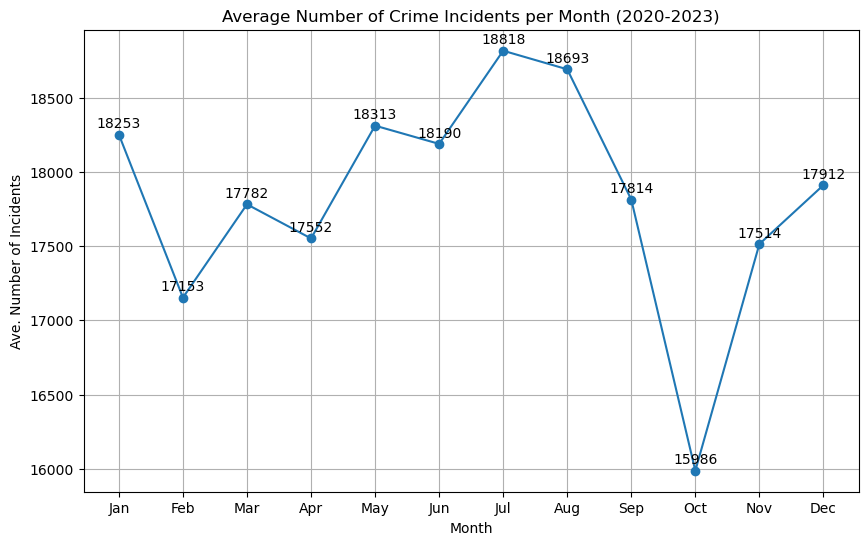

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

crime_data['Month'] = crime_data['DATE OCC'].dt.month

# Group the data by month and year and calculate the count
monthly_stats = crime_data.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Calculate the average number of incidents per month
monthly_mean = monthly_stats.groupby('Month')['Count'].mean()

# Calculate the total number of incidents per month
monthly_sum= monthly_stats.groupby('Month')['Count'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean.values, marker='o', linestyle='-')
plt.title('Average Number of Crime Incidents per Month (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Ave. Number of Incidents')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()

for x, y in zip(monthly_mean.index, monthly_mean.values):
    plt.annotate(int(y), (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

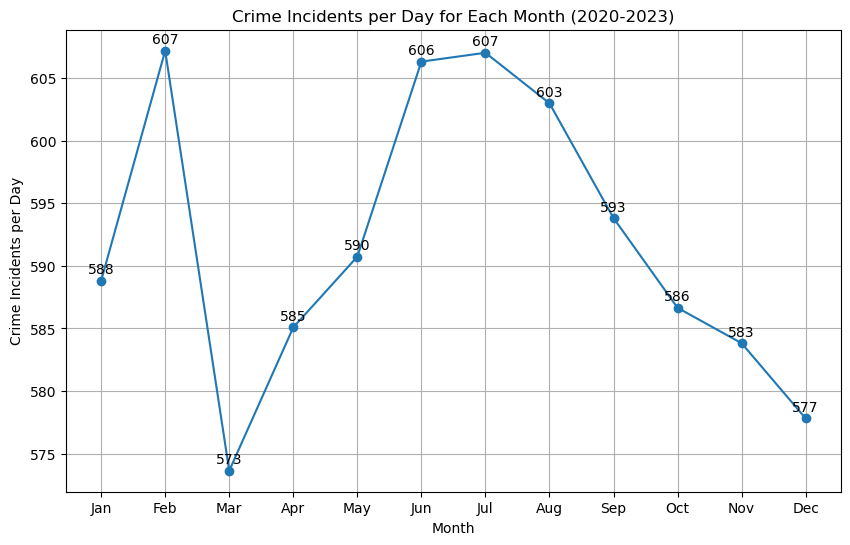

In [28]:
#adjust to different days in each month
days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
lst = []
# Calculate the crime incidents per day in each month
for i in range(1, 13):
    #adjust the number of days in October, as the dataset only contains 16 days in October, 2023
    if i == 10:
        monthly_crime_incidents_per_day = monthly_sum.values[9]/(31*3+16)
    #adjust the number of days in February, as there is a leap year in 2020
    elif i == 2:
        monthly_crime_incidents_per_day= monthly_sum.values[1]/(28*3+29)
    # No data available for NOV and DEC 2023, so  adjust the number of days in NOV and DEC 2023
    elif i == 11 or i == 12:
        monthly_crime_incidents_per_day = monthly_sum.values[i-1]/(days_in_month[i-1]*3)
    else:
        monthly_crime_incidents_per_day = monthly_sum.values[i-1]/(days_in_month[i-1]*4)
    lst.append(monthly_crime_incidents_per_day)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), lst, marker='o', linestyle='-')
plt.title('Crime Incidents per Day for Each Month (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Crime Incidents per Day')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec'])
plt.grid()

for x, y in zip(range(1, 13), lst):
    plt.annotate(int(y), (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

In [29]:
crime_data['Month'] = crime_data['DATE OCC'].dt.month
crime_by_month_and_type = crime_data.groupby(['Month', 'Crm Cd Desc']).size().unstack(fill_value=0)
crime_by_month_and_type

Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
Month,,,,,,,,,,,,,,,,,,,,,
1,173,62,3667,347,5486,13,221,306,1,1,...,57,4226,2094,201,7317,150,487,863,59,3
2,165,42,3428,370,5173,20,203,327,1,0,...,57,4100,1855,177,6793,123,485,824,58,2
3,172,65,3731,393,5498,18,235,299,1,0,...,52,4323,1954,203,7407,145,449,895,60,0
4,189,69,3950,374,5488,12,166,308,1,2,...,41,4337,1949,196,7649,165,509,953,71,5
5,225,214,4371,346,5926,23,188,297,1,0,...,49,4665,1996,216,7797,130,504,905,71,3
6,216,96,4465,355,5907,21,183,305,0,0,...,34,4688,1929,276,7795,152,498,888,84,7
7,225,89,4796,405,6379,23,228,320,0,0,...,35,4846,2018,345,8100,139,539,1002,92,3
8,217,83,4701,399,6313,26,229,351,0,0,...,27,4578,1924,344,8114,121,552,1069,89,5
9,203,76,4508,379,6055,15,192,369,1,1,...,28,4386,1851,309,7786,161,494,923,70,1


In [30]:
ls=[]
for column in crime_by_month_and_type.columns:
    if crime_by_month_and_type[column].sum() > 20000:
        ls.append(column)
ls

['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'BATTERY - SIMPLE ASSAULT',
 'BURGLARY',
 'BURGLARY FROM VEHICLE',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'ROBBERY',
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
 'THEFT OF IDENTITY',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
 'VEHICLE - STOLEN']

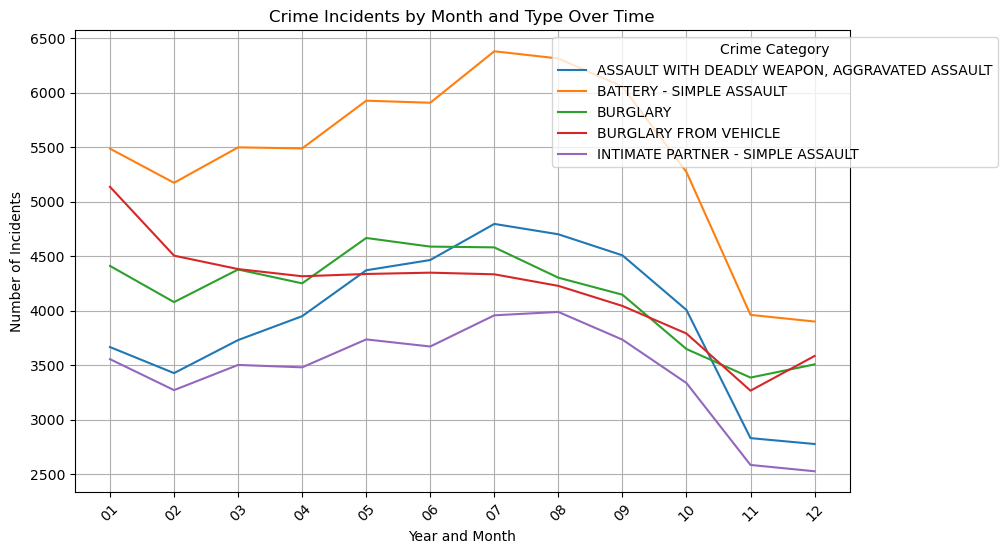

In [31]:
crime_categories = ls[:5]

plt.figure(figsize=(10,6))

# Create a custom x-axis with formatted labels
x_labels = [f"{month:02}" for month in crime_by_month_and_type.index]

for category in crime_categories:
    sns.lineplot(x=x_labels, y=crime_by_month_and_type[category], label=category)

    
plt.title('Crime Incidents by Month and Type Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Category', labels=crime_categories, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

Q4.3 Identify the most common type of crime and its trends over time.

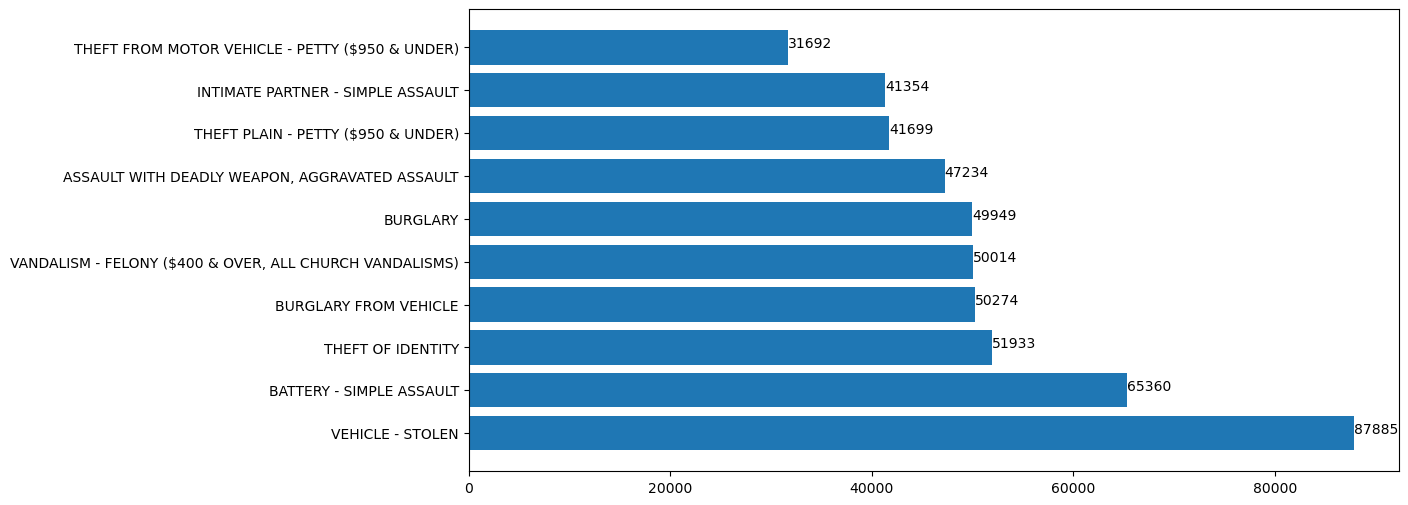

In [32]:

most_common_crime_types = crime_data['Crm Cd Desc'].value_counts()[:10]

plt.figure(figsize=(12, 6))

plt.barh(most_common_crime_types.index, most_common_crime_types.values)
for i, v in enumerate(most_common_crime_types.values):
    plt.text(v, i, str(v))

plt.show()

The most common type of crime is 'Vehicle - Stolen' which is about 85K overall followed by 'Battery - Simeple Assault' and 'Theft of Identity'.

Q4.4 Investigate if there are any notable differences in crime rates between regions or
cities.

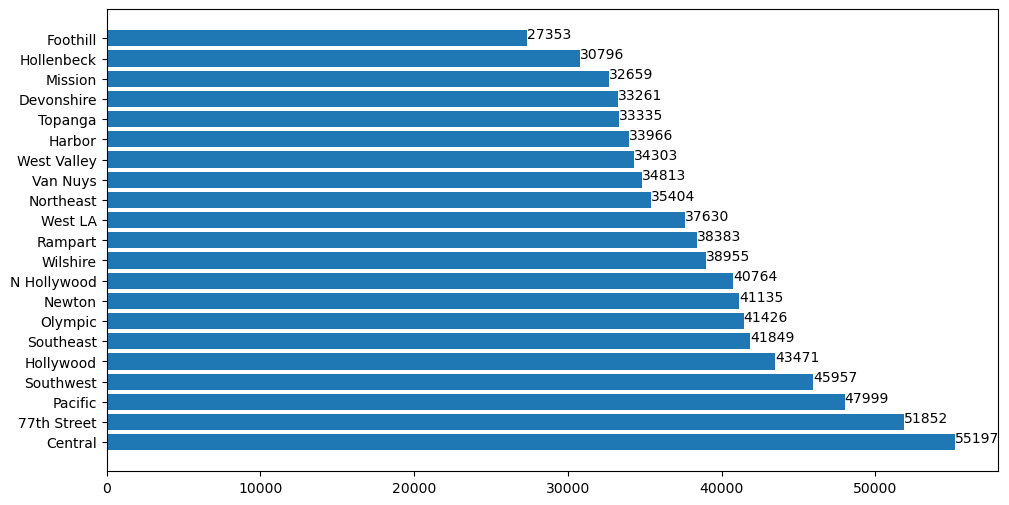

In [33]:
area_wise_crime = crime_data['AREA NAME'].value_counts()

plt.figure(figsize=(11.5, 6))
plt.barh(area_wise_crime.index, area_wise_crime.values)
for i, v in enumerate(area_wise_crime.values):
    plt.text(v, i, str(v))
plt.show()

The most of the crime happens in 'Central' part while the 'Foothill' has relatively low.

Q4.5 Explore correlations between economic factors (if available) and crime rates.

# 1) Correlation analysis b/w monthly ave crime counts and monthly ave unemployment rate from 1/1/2020 to 8/1/2023

         DATE  CALOSA7URN  YearMonth  Crime Count
0  2020-01-01         4.9 2020-01-01        18480
1  2020-02-01         4.9 2020-02-01        17252
2  2020-03-01         6.7 2020-03-01        16157
3  2020-04-01        17.0 2020-04-01        15676
4  2020-05-01        19.0 2020-05-01        17193
5  2020-06-01        17.8 2020-06-01        17023
6  2020-07-01        18.6 2020-07-01        17111
7  2020-08-01        17.0 2020-08-01        16867
8  2020-09-01        11.3 2020-09-01        15630
9  2020-10-01        10.4 2020-10-01        16482
10 2020-11-01        10.4 2020-11-01        15563
11 2020-12-01        10.8 2020-12-01        15936
12 2021-01-01        11.0 2021-01-01        16529
13 2021-02-01        10.5 2021-02-01        15404
14 2021-03-01        10.4 2021-03-01        16314
15 2021-04-01        10.2 2021-04-01        16052
16 2021-05-01         9.4 2021-05-01        16985
17 2021-06-01         9.9 2021-06-01        17143
18 2021-07-01         9.5 2021-07-01        18654


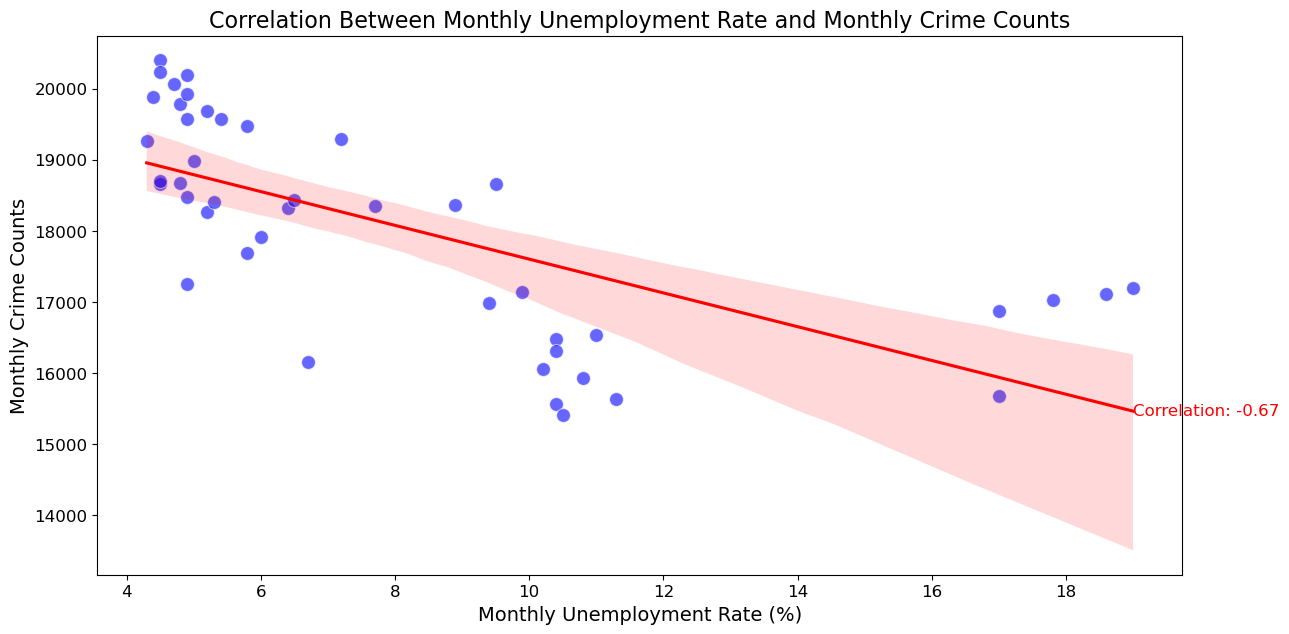

Correlation Coefficient: -0.67
P-value: 5.222700124903396e-07
Reject the null hypothesis: There is a statistically significant correlation.


In [34]:
unemployment_data = pd.read_csv(r'C:\Users\ronny\Desktop\unemployment rate.csv')

crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

daily_crime_counts = crime_data.groupby('DATE OCC').size().reset_index(name='Crime Count')

daily_crime_counts['YearMonth'] = daily_crime_counts['DATE OCC'].dt.to_period('M')

monthly_crime_counts = daily_crime_counts.groupby('YearMonth')['Crime Count'].sum().reset_index()

monthly_crime_counts['YearMonth'] = monthly_crime_counts['YearMonth'].dt.to_timestamp()
unemployment_data['DATE'] = pd.to_datetime(unemployment_data['DATE'])


start_date = '2020-01-01'
end_date = '2023-08-01'

filtered_unemployment_data = unemployment_data[(unemployment_data['DATE'] >= start_date) & (unemployment_data['DATE'] <= end_date)]
filtered_crime_data = monthly_crime_counts[(monthly_crime_counts['YearMonth'] >= start_date) & (monthly_crime_counts['YearMonth'] <= end_date)]

filtered_merged_data = pd.merge(filtered_unemployment_data, filtered_crime_data, left_on='DATE', right_on='YearMonth', how='inner')
print(filtered_merged_data)
filtered_correlation = filtered_merged_data['CALOSA7URN'].corr(filtered_merged_data['Crime Count'])

plt.figure(figsize=(14, 7))
sns.scatterplot(data=filtered_merged_data, x='CALOSA7URN', y='Crime Count', color='blue', s=100, alpha=0.6)
sns.regplot(data=filtered_merged_data, x='CALOSA7URN', y='Crime Count', scatter=False, color='red')

plt.title('Correlation Between Monthly Unemployment Rate and Monthly Crime Counts', fontsize=16)
plt.xlabel('Monthly Unemployment Rate (%)', fontsize=14)
plt.ylabel('Monthly Crime Counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(max(filtered_unemployment_data['CALOSA7URN']), min(filtered_crime_data['Crime Count']), 
         f'Correlation: {filtered_correlation:.2f}', fontsize=12, color='red')

plt.show()


# conduct hypothesis testing on the correlation coefficient
from scipy.stats import pearsonr

corr_coeff, p_value = pearsonr(filtered_merged_data['CALOSA7URN'], filtered_merged_data['Crime Count'])
print(f"Correlation Coefficient: {corr_coeff:.2f}")
print(f"P-value: {p_value}")
# Evaluate the significance based on the p-value
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant correlation.")

# 2) Correlation analysis b/w crime incidents and CPI-U from Jan 2020 to Sept. 2023

In [35]:
# Load the Excel file downloaded from the U.S. Bureau of Labor Statistics
file_path = r'C:\Users\ronny\Desktop\彭杨的\FDA\Project 1\CPI-U.xlsx'  
cpi_U = pd.read_excel(file_path)

#remove the last 3 columns
cpi_U = cpi_U.iloc[:, :-3]
print(cpi_U.head())

#delete the year index column
cpi_U = cpi_U.drop('Year', axis=1) 

   Year      Jan      Feb      Mar      Apr      May      Jun      Jul  \
0  2020  277.755  278.657  276.589  275.853  276.842  278.121  279.899   
1  2021  280.178  281.347  282.648  285.808  287.620  289.218  290.890   
2  2022  301.209  302.164  306.679  308.302  310.649  314.072  313.415   
3  2023  318.591  317.571  317.873  320.089  320.514  322.055  321.931   

       Aug      Sep      Oct      Nov      Dec  
0  280.116  279.366  279.947  280.102  279.560  
1  291.333  292.209  294.961  296.790  297.925  
2  313.608  315.033  317.014  314.633  312.601  
3  324.050  324.984      NaN      NaN      NaN  


In [36]:
#convert values into a Series
cpi_U = cpi_U.stack()

#rename the index columns
cpi_U.index.names = ['Year', 'Month']

#reset the first level index values to year
cpi_U.index = cpi_U.index.set_levels([2020, 2021, 2022, 2023], level=0)

#reset the column name
cpi_U = cpi_U.reset_index(name='CPI-U')
print(cpi_U)

    Year Month    CPI-U
0   2020   Jan  277.755
1   2020   Feb  278.657
2   2020   Mar  276.589
3   2020   Apr  275.853
4   2020   May  276.842
5   2020   Jun  278.121
6   2020   Jul  279.899
7   2020   Aug  280.116
8   2020   Sep  279.366
9   2020   Oct  279.947
10  2020   Nov  280.102
11  2020   Dec  279.560
12  2021   Jan  280.178
13  2021   Feb  281.347
14  2021   Mar  282.648
15  2021   Apr  285.808
16  2021   May  287.620
17  2021   Jun  289.218
18  2021   Jul  290.890
19  2021   Aug  291.333
20  2021   Sep  292.209
21  2021   Oct  294.961
22  2021   Nov  296.790
23  2021   Dec  297.925
24  2022   Jan  301.209
25  2022   Feb  302.164
26  2022   Mar  306.679
27  2022   Apr  308.302
28  2022   May  310.649
29  2022   Jun  314.072
30  2022   Jul  313.415
31  2022   Aug  313.608
32  2022   Sep  315.033
33  2022   Oct  317.014
34  2022   Nov  314.633
35  2022   Dec  312.601
36  2023   Jan  318.591
37  2023   Feb  317.571
38  2023   Mar  317.873
39  2023   Apr  320.089
40  2023   May  

In [37]:
# truncate crime data from 1/1/2020 to 9/30/2023 to match the CPI-U data
truncated_crime_data_by_Sep = crime_data[crime_data['DATE OCC'] <= '2023-09-30'] 
truncated_crime_data_by_Sep = truncated_crime_data_by_Sep.assign(
    Year=truncated_crime_data_by_Sep['DATE OCC'].dt.year, Month=truncated_crime_data_by_Sep['DATE OCC'].dt.month)

# compute the daily crime count and group by year and month
daily_crime = truncated_crime_data_by_Sep .groupby('DATE OCC').size().reset_index(name='Crime Count')
daily_crime['Yr Mth'] = daily_crime['DATE OCC'].dt.to_period('M')

monthly_crime_by_Sep = daily_crime.groupby('Yr Mth')['Crime Count'].sum().reset_index()

     Yr Mth  Crime Count    CPI-U
0   2020-01        18480  277.755
1   2020-02        17252  278.657
2   2020-03        16157  276.589
3   2020-04        15676  275.853
4   2020-05        17193  276.842
5   2020-06        17023  278.121
6   2020-07        17111  279.899
7   2020-08        16867  280.116
8   2020-09        15630  279.366
9   2020-10        16482  279.947
10  2020-11        15563  280.102
11  2020-12        15936  279.560
12  2021-01        16529  280.178
13  2021-02        15404  281.347
14  2021-03        16314  282.648
15  2021-04        16052  285.808
16  2021-05        16985  287.620
17  2021-06        17143  289.218
18  2021-07        18654  290.890
19  2021-08        18366  291.333
20  2021-09        18346  292.209
21  2021-10        19289  294.961
22  2021-11        18321  296.790
23  2021-12        17912  297.925
24  2022-01        18431  301.209
25  2022-02        17688  302.164
26  2022-03        19682  306.679
27  2022-04        19779  308.302
28  2022-05   

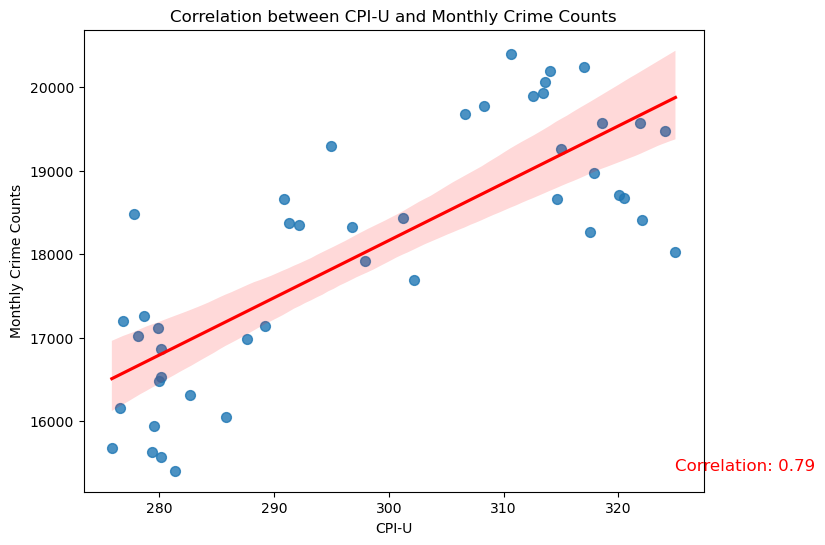

In [38]:
#conduct correlation analysis b/w crime incidents and CPI-U, using monthly variables

# Combine 'Monthly Crime Counts' and 'Monthly CPI-U' series into a DataFrame
combined = pd.concat([monthly_crime_by_Sep, cpi_U['CPI-U']], axis=1)

# Show the created DataFrame
print(combined)

# Create a scatter plot with a regression line (trend line)
plt.figure(figsize=(8, 6))
scatter = sns.regplot(x= combined['CPI-U'], y=combined['Crime Count'], data=combined, 
                      scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('Correlation between CPI-U and Monthly Crime Counts')
plt.ylabel('Monthly Crime Counts')
plt.xlabel('CPI-U')

# Calculate the correlation coefficient and show it on the plot
corr_coeff = combined['CPI-U'].corr(combined['Crime Count'])
plt.text(max(combined['CPI-U']), min(combined['Crime Count']), f'Correlation: {corr_coeff:.2f}', fontsize=12, color='red')

plt.show()

In [39]:
# conduct hypothesis testing on the correlation coefficient

corr_coeff, p_value = pearsonr(combined['Crime Count'], combined['CPI-U'])

print(f"Correlation Coefficient: {corr_coeff:.2f}")
print(f"P-value: {p_value}")

# Evaluate the significance based on the p-value
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant correlation.")


Correlation Coefficient: 0.79
P-value: 7.048587960250187e-11
Reject the null hypothesis: There is a statistically significant correlation.


# 3) Correlation analysis b/w crime incidents and inflation rate from Jan 2020 to Sept. 2023

     Yr Mth  Crime Count  Inflation Rate
0   2020-01        18480        0.799120
1   2020-02        17252        0.324747
2   2020-03        16157       -0.742131
3   2020-04        15676       -0.266099
4   2020-05        17193        0.358524
5   2020-06        17023        0.461996
6   2020-07        17111        0.639290
7   2020-08        16867        0.077528
8   2020-09        15630       -0.267746
9   2020-10        16482        0.207971
10  2020-11        15563        0.055368
11  2020-12        15936       -0.193501
12  2021-01        16529        0.221062
13  2021-02        15404        0.417235
14  2021-03        16314        0.462418
15  2021-04        16052        1.117998
16  2021-05        16985        0.633992
17  2021-06        17143        0.555594
18  2021-07        18654        0.578111
19  2021-08        18366        0.152291
20  2021-09        18346        0.300687
21  2021-10        19289        0.941792
22  2021-11        18321        0.620082
23  2021-12     

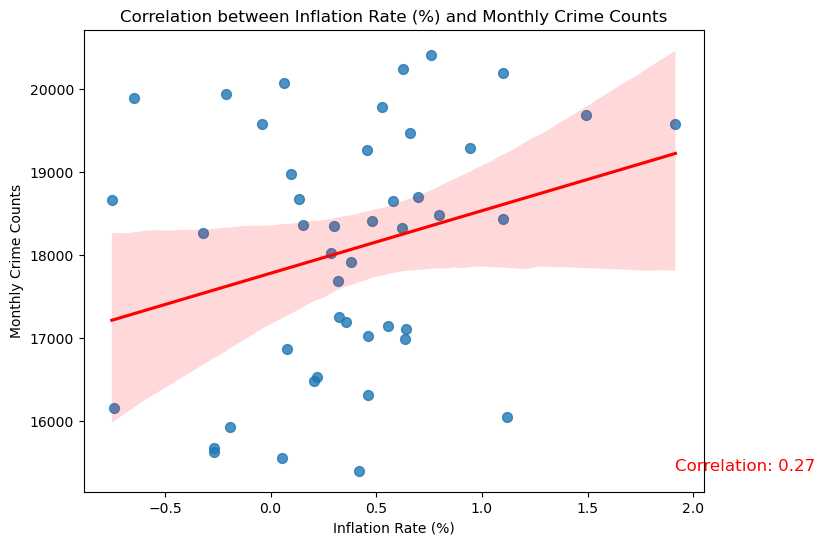

Correlation Coefficient: 0.27
P-value: 0.06829401712281054
Fail to reject the null hypothesis: There is no statistically significant correlation.


In [40]:
# Calculate the inflation rate
# Shift the CPI values by one to get the previous month's CPI
cpi_U['Previous Monthly CPI'] = cpi_U['CPI-U'].shift(1)
#deal with the missing value in Jan 2020 
# (use the CPI-U value in Dec 2019: 275.553, retrieved from the US Bureau of Labor Statistics)
cpi_U.loc[0, 'Previous Monthly CPI'] = 275.553

# Calculate the inflation rate for each month
cpi_U['Inflation Rate'] = ((cpi_U['CPI-U'] - cpi_U['Previous Monthly CPI']) / cpi_U['Previous Monthly CPI']) * 100




#conduct correlation analysis b/w crime incidents and inflation rate, using monthly variables
combined_inflation = pd.concat([monthly_crime_by_Sep, cpi_U['Inflation Rate']], axis=1)

# Show the created DataFrame
print(combined_inflation)

# Create a scatter plot with a regression line (trend line)
plt.figure(figsize=(8, 6))
scatter = sns.regplot(x= combined_inflation['Inflation Rate'], y=combined_inflation['Crime Count'], data=combined_inflation, scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('Correlation between Inflation Rate (%) and Monthly Crime Counts')
plt.ylabel('Monthly Crime Counts')
plt.xlabel('Inflation Rate (%)')

# Calculate the correlation coefficient and show it on the plot
corr_coeff_2 = combined_inflation['Inflation Rate'].corr(combined_inflation['Crime Count'])
plt.text(max(combined_inflation['Inflation Rate']), min(combined_inflation['Crime Count']), f'Correlation: {corr_coeff_2:.2f}', fontsize=12, color='red')

plt.show()

# conduct hypothesis testing on the correlation coefficient

corr_coeff, p_value = pearsonr(combined_inflation['Inflation Rate'], combined_inflation['Crime Count'])

print(f"Correlation Coefficient: {corr_coeff:.2f}")
print(f"P-value: {p_value}")

# Evaluate the significance based on the p-value
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant correlation.")

# 4) Correlation analysis b/w crime incidents and Mortgage Delinquency Rate from 2020 to Mar. 2023

In [41]:
# Retrieve mortgage delinquency rate data from the Consumer Financial Protection Bureau
data = [
    1.4, 1.2, 1.2, 0.8, 0.7, 0.6, 0.7, 0.6, 0.6, 0.6, 0.4, 0.4, 0.5, 0.5, 0.5, 0.4, 0.5, 0.4, 0.5, 0.5, 0.4,
    0.5, 0.5, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6, 0.5, 0.6, 0.7, 0.6, 0.7, 0.7, 0.8, 0.8, 0.6, 0.8
]

# Create a datetime index from January 2020 to March 2023
date_range = pd.date_range(start='2020-01', end='2023-04', freq='M')

# Create a DataFrame for mortgage delinquency rate data with year and month as index columns
mortgage_delq= pd.DataFrame(data, index=date_range, columns=['Mortgage Delinquency Rate'])
mortgage_delq.index = mortgage_delq.index.to_period('M')  # Set the index to Year and Month

# Reset the index to keep the default index column
mortgage_delq.reset_index(inplace=True)
mortgage_delq.rename(columns={'index': 'Date'}, inplace=True)




#prepare the crime data

# truncate crime data to 2023-3-31 to match the Mortgage Delinquency data
truncated_crime_data_by_Mar = crime_data[crime_data['DATE OCC'] <= '2023-3-31'] 
truncated_crime_data_by_Mar = truncated_crime_data_by_Mar.assign(
    Year=truncated_crime_data_by_Mar['DATE OCC'].dt.year, Month=truncated_crime_data_by_Mar['DATE OCC'].dt.month)

# compute the daily crime count and group by year and month
daily_crime_Mar = truncated_crime_data_by_Mar .groupby('DATE OCC').size().reset_index(name='Crime Count')
daily_crime_Mar['Yr Mth'] = daily_crime_Mar['DATE OCC'].dt.to_period('M')

monthly_crime_by_Mar = daily_crime_Mar.groupby('Yr Mth')['Crime Count'].sum().reset_index()



# concatenate the two 
combined_df = pd.concat([mortgage_delq, monthly_crime_by_Mar['Crime Count']], axis=1)

print(combined_df)

       Date  Mortgage Delinquency Rate  Crime Count
0   2020-01                        1.4        18480
1   2020-02                        1.2        17252
2   2020-03                        1.2        16157
3   2020-04                        0.8        15676
4   2020-05                        0.7        17193
5   2020-06                        0.6        17023
6   2020-07                        0.7        17111
7   2020-08                        0.6        16867
8   2020-09                        0.6        15630
9   2020-10                        0.6        16482
10  2020-11                        0.4        15563
11  2020-12                        0.4        15936
12  2021-01                        0.5        16529
13  2021-02                        0.5        15404
14  2021-03                        0.5        16314
15  2021-04                        0.4        16052
16  2021-05                        0.5        16985
17  2021-06                        0.4        17143
18  2021-07 

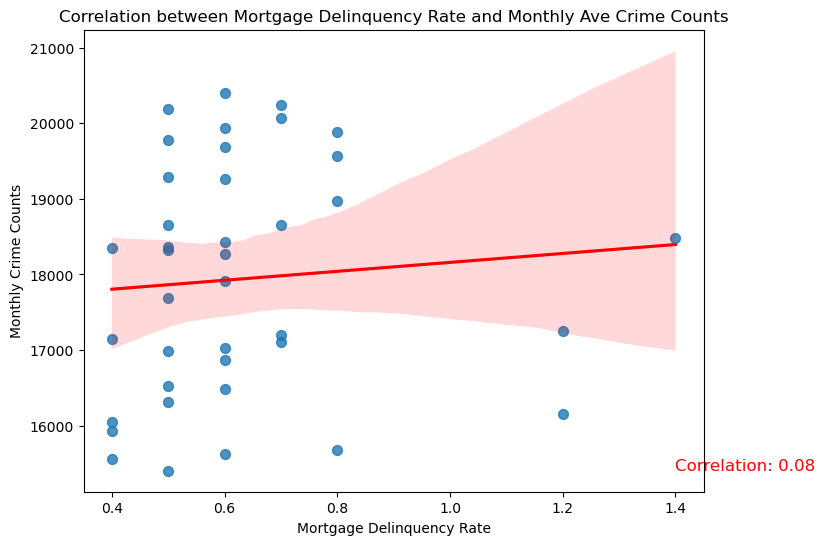

In [42]:
#correlation analysis b/w crime incidents and mortgage delinquency rate, using monthly variables

mortgage = combined_df['Mortgage Delinquency Rate']
crimeNumber= combined_df['Crime Count']

# Create a scatter plot with a regression line (trend line)
plt.figure(figsize=(8, 6))
scatter = sns.regplot(x= mortgage, y= crimeNumber, scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('Correlation between Mortgage Delinquency Rate and Monthly Ave Crime Counts')
plt.ylabel('Monthly Crime Counts')
plt.xlabel('Mortgage Delinquency Rate')

# Calculate the correlation coefficient and show it on the plot
corr_coeff_3 = crimeNumber.corr(mortgage)
plt.text(max(mortgage), min(crimeNumber), f'Correlation: {corr_coeff_3:.2f}', fontsize=12, color='red')

plt.show()

In [43]:
# conduct hypothesis testing on the correlation coefficient

corr_coeff, p_value = pearsonr(crimeNumber, mortgage)

print(f"Correlation Coefficient: {corr_coeff:.2f}")
print(f"P-value: {p_value:.3f}")

# Evaluate the significance based on the p-value
alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant correlation.")


Correlation Coefficient: 0.08
P-value: 0.609
Fail to reject the null hypothesis: There is no statistically significant correlation.


Q4.6 Analyze the relationship between the day of the week and the frequency of certain
types of crimes.

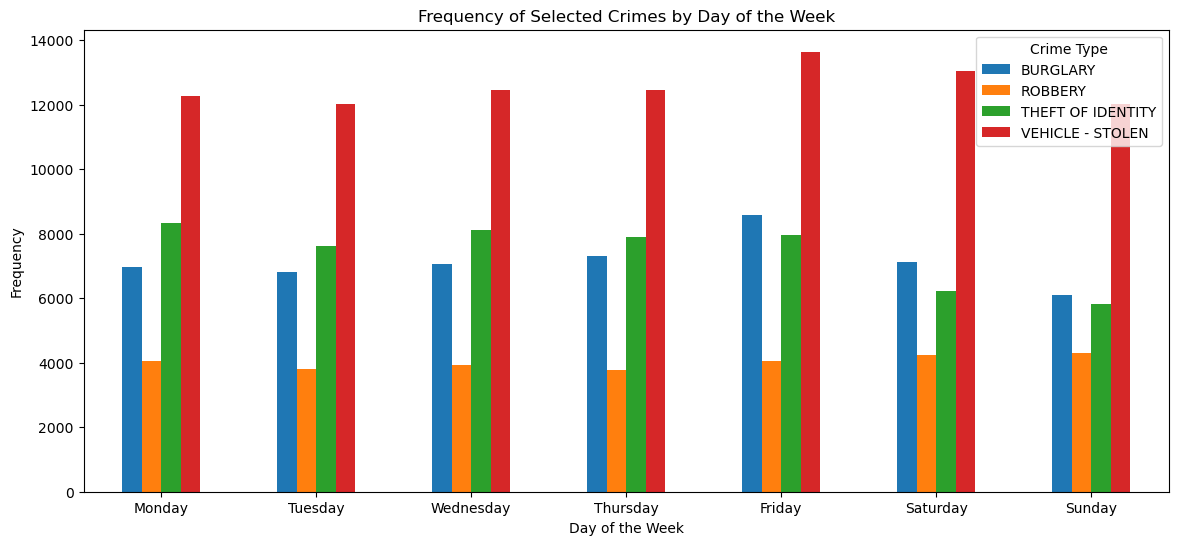

In [44]:
desired_crimes = ['THEFT OF IDENTITY', 'ROBBERY', 'VEHICLE - STOLEN', 'BURGLARY']
day_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_data['Day'] = crime_data['DATE OCC'].dt.day_name()
crime_data['Day'] = pd.Categorical(crime_data['Day'], categories=day_order, ordered=True)

desried_crime_df = crime_data[crime_data['Crm Cd Desc'].isin(desired_crimes)]

crime_day = desried_crime_df.groupby(['Day', 'Crm Cd Desc']).size().unstack().fillna(0)

crime_day.plot(kind='bar', figsize=(14, 6))
plt.title('Frequency of Selected Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Crime Type')
plt.show()

For any day of week, crimes are somewhat with same frequency, meaning that there's no relationship of day of the week with the crime type.

Q4.7 Investigate any impact of major events or policy changes on crime rates.

In [45]:
crime_data['Day'] = crime_data['DATE OCC'].dt.day

In [46]:
crime_data[["Date Rptd","DATE OCC","Crm Cd Desc","Year","Month","Day"]]

,Date Rptd,DATE OCC,Crm Cd Desc,Year,Month,Day
0,2020-01-08,2020-01-08,BATTERY - SIMPLE ASSAULT,2020,1,8
1,2020-01-02,2020-01-01,BATTERY - SIMPLE ASSAULT,2020,1,1
2,2020-04-14,2020-02-13,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,2020,2,13
3,2020-01-01,2020-01-01,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2020,1,1
4,2020-01-01,2020-01-01,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2020,1,1
...,...,...,...,...,...,...
820594,2023-01-27,2023-01-26,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2023,1,26
820595,2023-03-22,2023-03-22,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2023,3,22
820596,2023-04-12,2023-04-12,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2023,4,12
820597,2023-07-02,2023-07-01,PICKPOCKET,2023,7,1


In [47]:
important_events = {'Event': ['Christmas Day','New Years Eve','Thanksgiving Day'], 'Day' : ['25','31','23'], 'Month' : ['12','12','11']}
important_events = pd.DataFrame(important_events)
important_events

,Event,Day,Month
0,Christmas Day,25,12
1,New Years Eve,31,12
2,Thanksgiving Day,23,11


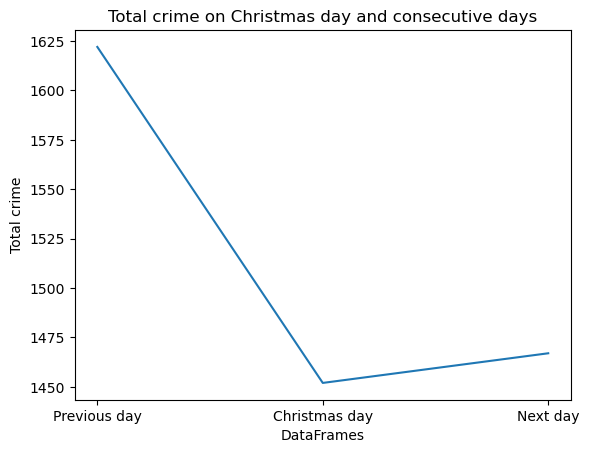

In [48]:
Day = important_events['Day'][0]
Month = important_events['Month'][0]
matching_dataframes = []
# Filter rows that match the target date across all years
matching_rows = crime_data[(crime_data['Month']==int(Month)) & (crime_data['Day']==int(Day))]


matching_rows[["Date Rptd","DATE OCC","Crm Cd Desc","Year","Month","Day"]]
prev_day_rows = crime_data[(crime_data['Month']==int(Month)) & (crime_data['Day']==int(Day)-1)]
prev_day_rows[["Date Rptd","DATE OCC","Crm Cd Desc","Year","Month","Day"]]
Next_day_rows = crime_data[(crime_data['Month']==int(Month)) & (crime_data['Day']==int(Day)+1)]
Next_day_rows[["Date Rptd","DATE OCC","Crm Cd Desc","Year","Month","Day"]]

count2 = len(matching_rows)
count1 = len(prev_day_rows)
count3 = len(Next_day_rows)

# Create a DataFrame to store the counts
counts_df = pd.DataFrame({'DataFrame': ['Previous day', 'Christmas day', 'Next day'], 'Row_Count': [count1, count2, count3]})

# Plot the total row counts
plt.plot(counts_df['DataFrame'], counts_df['Row_Count'])
plt.xlabel('DataFrames')
plt.ylabel('Total crime')
plt.title('Total crime on Christmas day and consecutive days')

plt.show()

It can be observed from the above graph , the crime rates drop significantly on the day of christmas.

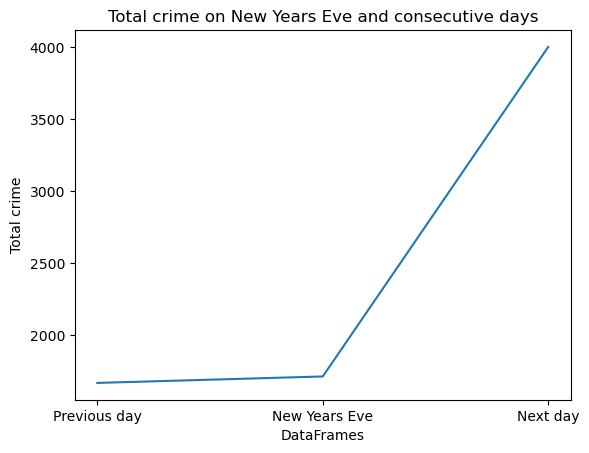

In [49]:
Day = important_events['Day'][1]
Month = important_events['Month'][1]
matching_dataframes = []
# Filter rows that match the target date across all years
matching_rows = crime_data[(crime_data['Month']==int(Month)) & (crime_data['Day']==int(Day))]


matching_rows[["Date Rptd","DATE OCC","Crm Cd Desc","Year","Month","Day"]]
prev_day_rows = crime_data[(crime_data['Month']==int(Month)) & (crime_data['Day']==int(Day)-1)]
prev_day_rows[["Date Rptd","DATE OCC","Crm Cd Desc","Year","Month","Day"]]
Next_day_rows = crime_data[(crime_data['Month']==1) & (crime_data['Day']==1)]
Next_day_rows[["Date Rptd","DATE OCC","Crm Cd Desc","Year","Month","Day"]]
count2 = len(matching_rows)
count1 = len(prev_day_rows)
count3 = len(Next_day_rows)

# Create a DataFrame to store the counts
counts_df = pd.DataFrame({'DataFrame': ['Previous day', 'New Years Eve', 'Next day'], 'Row_Count': [count1, count2, count3]})

# Plot the total row counts
plt.plot(counts_df['DataFrame'], counts_df['Row_Count'])
plt.xlabel('DataFrames')
plt.ylabel('Total crime')
plt.title('Total crime on New Years Eve and consecutive days')

plt.show()

It can be observed the crime rates rise significantly on the next day of New Years.

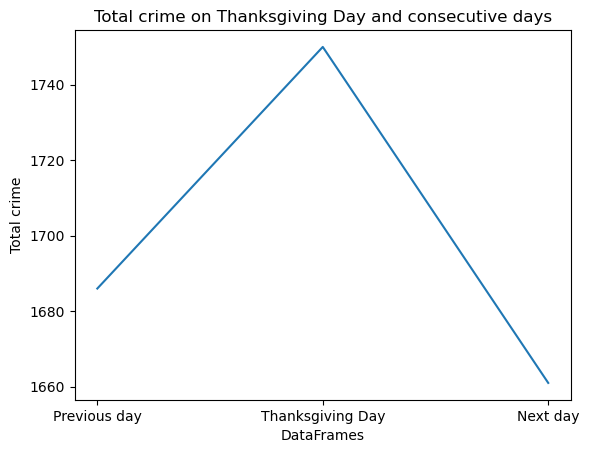

In [50]:
Day = important_events['Day'][2]
Month = important_events['Month'][2]
matching_dataframes = []
# Filter rows that match the target date across all years
matching_rows = crime_data[(crime_data['Month']==int(Month)) & (crime_data['Day']==int(Day))]


matching_rows[["Date Rptd","DATE OCC","Crm Cd Desc","Year","Month","Day"]]
prev_day_rows = crime_data[(crime_data['Month']==int(Month)) & (crime_data['Day']==int(Day)-1)]
prev_day_rows[["Date Rptd","DATE OCC","Crm Cd Desc","Year","Month","Day"]]
Next_day_rows = crime_data[(crime_data['Month']==int(Month)+1) & (crime_data['Day']==int(Month)+1)]
Next_day_rows[["Date Rptd","DATE OCC","Crm Cd Desc","Year","Month","Day"]]
count2 = len(matching_rows)
count1 = len(prev_day_rows)
count3 = len(Next_day_rows)

# Create a DataFrame to store the counts
counts_df = pd.DataFrame({'DataFrame': ['Previous day', 'Thanksgiving Day', 'Next day'], 'Row_Count': [count1, count2, count3]})

# Plot the total row counts
plt.plot(counts_df['DataFrame'], counts_df['Row_Count'])
plt.xlabel('DataFrames')
plt.ylabel('Total crime')
plt.title('Total crime on Thanksgiving Day and consecutive days')

plt.show()

It can be observed from the graph above, crime rates have a significant spike on thanks giving day.

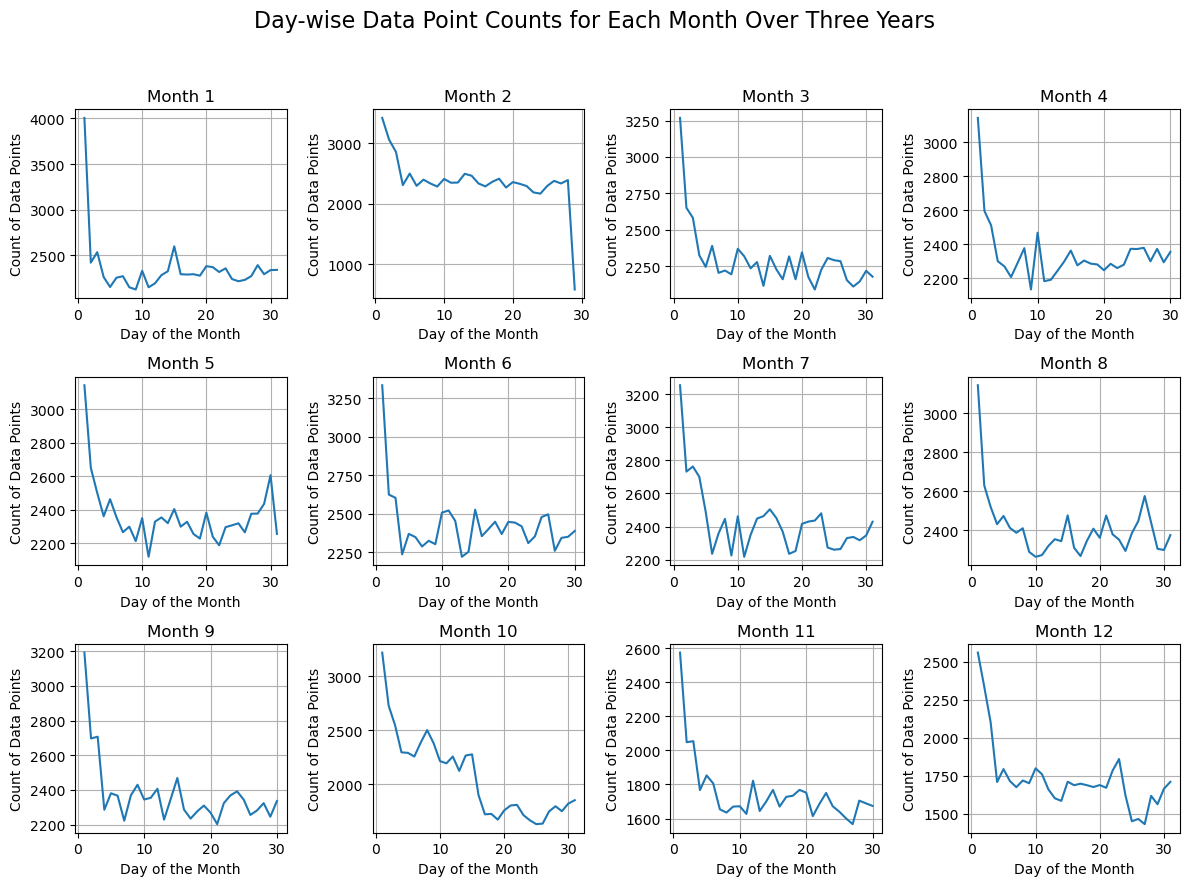

In [51]:
import matplotlib.pyplot as plt
import pandas as pd


fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle('Day-wise Data Point Counts for Each Month Over Three Years', fontsize=16)
monthly_day_counts = crime_data.groupby(['Month', 'Day']).size()

for month in range(1, 13):
    monthly_counts = monthly_day_counts[month]
    
    
    row = (month - 1) // 4
    col = (month - 1) % 4
    
    
    ax = axes[row, col]
    
    
    ax.plot(monthly_counts.index.get_level_values('Day'), monthly_counts)
    ax.set_xlabel('Day of the Month')
    ax.set_ylabel('Count of Data Points')
    ax.set_title(f'Month {month}')
    ax.grid(True)


plt.tight_layout(rect=[0, 0, 1, 0.95])


plt.show()

5. Advanced Analysis (Optional):
o Use predictive modeling techniques (e.g., time series forecasting) to predict future
crime trends.
o Explore additional questions or hypotheses related to the dataset.

In [52]:
crime_categories

['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'BATTERY - SIMPLE ASSAULT',
 'BURGLARY',
 'BURGLARY FROM VEHICLE',
 'INTIMATE PARTNER - SIMPLE ASSAULT']

In [53]:
crime_data_series=crime_data.groupby(['Year','Month', 'Crm Cd Desc']).size().unstack(fill_value=0)
crime_data_series

Crm Cd Desc  ARSON  ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER  \
Year Month                                                         
2020 1          45                                             1   
     2          46                                            11   
     3          29                                             4   
     4          37                                            23   
     5          71                                           150   
     6          63                                            44   
     7          66                                            22   
     8          55                                            29   
     9          71                                            11   
     10         78                                            75   
     11         55                                            12   
     12         49                                            15   
2021 1          64                                            22   
     2          48                                            11   
     3          60                                            26   
     4          54                                            16   
     5          54                                            17   
     6          52                                             7   
     7          63                                            23   
     8          54                                            21   
     9          47                                            12   
     10         52                                            11   
     11         47                                             8   
     12         32                                            43   
2022 1          34                                            17   
     2          30                                            15   
     3          52                                            15   
     4          40                                            12   
     5          50                                            28   
     6          45                                            31   
     7          41                                            27   
     8          45                                            12   
     9          52                                            35   
     10         54                                            17   
     11         36                                             9   
     12         52                                             9   
2023 1          30                                            22   
     2          41                                             5   
     3          31                                            20   
     4          58                                            18   
     5          50                                            19   
     6          56                                            14   
     7          55                                            17   
     8          63                                            21   
     9          33                                            18   
     10         20                                             7   

Crm Cd Desc  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  \
Year Month                                                    
2020 1                                                  810   
     2                                                  744   
     3                                                  762   
     4                                                  888   
     5                                                  966   
     6                                                 1037   
     7                                                 1073   
     8                                                 1112   
     9                                                 1078   
     10                                   

In [54]:
crime_data_series['ARSON'].values

array([45, 46, 29, 37, 71, 63, 66, 55, 71, 78, 55, 49, 64, 48, 60, 54, 54,
       52, 63, 54, 47, 52, 47, 32, 34, 30, 52, 40, 50, 45, 41, 45, 52, 54,
       36, 52, 30, 41, 31, 58, 50, 56, 55, 63, 33, 20], dtype=int64)

In [55]:
crime_data_series.index = pd.to_datetime(['{}-{}'.format(year, month) for year, month in crime_data_series.index])

In [56]:
crime_data_series.reset_index(inplace=True)
crime_data_series.set_index('index', inplace=True)


In [57]:
crime_data_series=crime_data_series[crime_categories]
crime_data_series

Crm Cd Desc,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",BATTERY - SIMPLE ASSAULT,BURGLARY,BURGLARY FROM VEHICLE,INTIMATE PARTNER - SIMPLE ASSAULT
index,,,,,
2020-01-01,810,1533,981,1444,989
2020-02-01,744,1444,1005,1235,899
2020-03-01,762,1350,1085,1120,912
2020-04-01,888,1197,1053,1151,865
2020-05-01,966,1330,1442,1048,951
2020-06-01,1037,1381,1242,1059,898
2020-07-01,1073,1472,1092,1024,896
2020-08-01,1112,1530,913,901,1020
2020-09-01,1078,1323,912,790,877


In [58]:
crime_data_series.columns

Index(['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BATTERY - SIMPLE ASSAULT', 'BURGLARY', 'BURGLARY FROM VEHICLE',
       'INTIMATE PARTNER - SIMPLE ASSAULT'],
      dtype='object', name='Crm Cd Desc')

Data Cleaning and preparation of forecasting

In [59]:
crime_by_month_year = crime_data.groupby(['Year','Month']).size()

In [60]:
crime_by_month_year.index=pd.to_datetime(['{}-{}'.format(year, month) for year, month in crime_by_month_year.index])

In [61]:
crime_by_month_year=pd.Series(crime_by_month_year)

In [62]:
crime_by_month_year.iloc[-1]=crime_by_month_year.mean()

SARIMA Model for forecasting

In [63]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


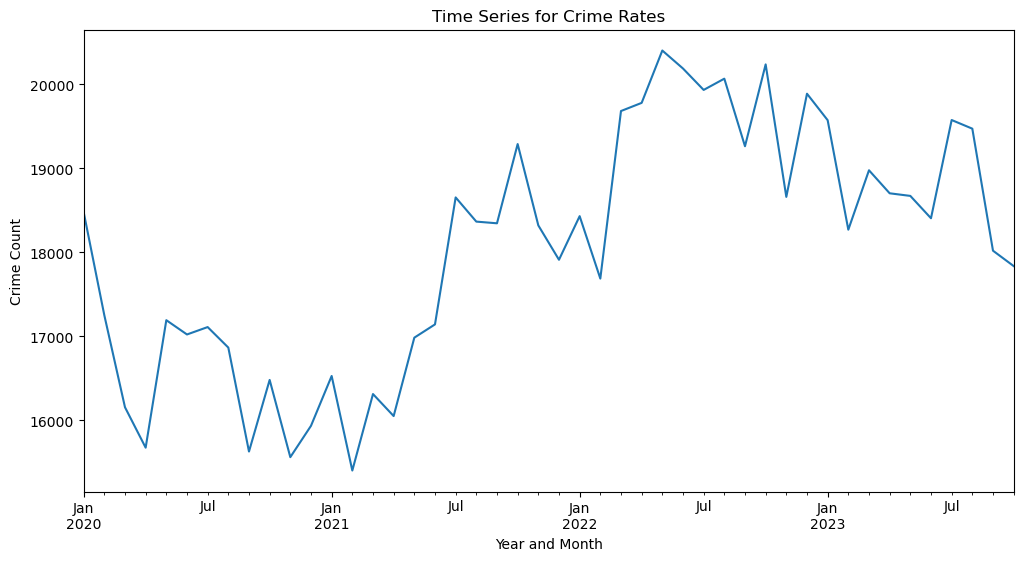

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=738.187, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=739.734, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=734.576, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=732.945, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=737.746, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=732.976, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=733.954, Time=0.20 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=733.367, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=732.518, Time=0.07 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=733.632, Time=0.20 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=736.679, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=733.408, Time=0.10 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=733.499, Time=0.03 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   

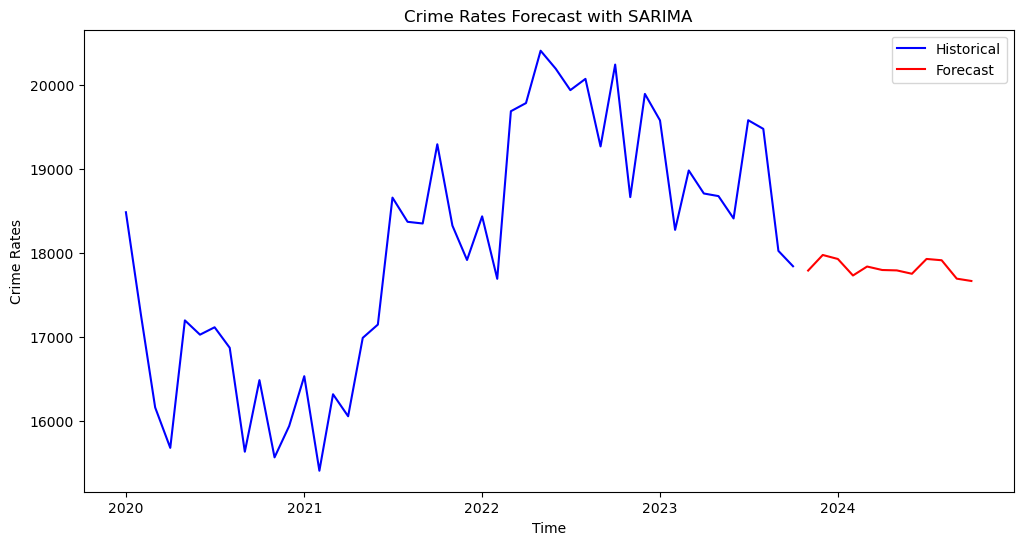

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

crime_series = crime_by_month_year

plt.figure(figsize=(12, 6))
crime_series.plot()
plt.title(f'Time Series for Crime Rates')
plt.xlabel('Year and Month')
plt.ylabel('Crime Count')
plt.show()


model = pm.auto_arima(
    crime_series,
    seasonal=True,
    stepwise=True,
    suppress_warnings=True,
    trace=True,
    error_action='ignore',
    max_order=None,
    m=12,  
)

print(model.summary())

# Forecasting the next 12 months with the SARIMA model
forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)
forecast_index = pd.date_range(start=crime_series.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')


forecast_series = pd.Series(forecast, index=forecast_index)

plt.figure(figsize=(12, 6))

plt.plot(crime_series, label='Historical', color='blue')


plt.plot(forecast_series, label='Forecast', color='red')

plt.title('Crime Rates Forecast with SARIMA')
plt.xlabel('Time')
plt.ylabel('Crime Rates')
plt.legend()
plt.show()
